## Моделирование детерминированных сигналов

In [216]:
import matplotlib.pyplot as plt #импорт библиотеки для отображения графиков
import numpy as np #импорт библиотеки с математическими функциями 
from numpy.fft import fft
from scipy.fftpack import fftshift
from scipy.signal import periodogram

### Инициализация и формирование значений основных параметров

In [217]:
%matplotlib inline 
#делаем так, что бы графики отображались сразу после построения

In [218]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6 # настраиваем параметры отображения графика
fontSize=15 # Размер шрифта графиков
rcParams.update({'font.size': fontSize})

In [219]:
A0=2; # Постоянная составляющая сигнала
A=3; # Амплитуда сигнала
fmin=2; fmax=10; f0=15; # Частота сигнала, Гц
fd=100; # Частота дискретизации, Гц
tmin=-1; tmax=4; dt=tmax-tmin; # Интервал определения функции
N = dt*fd; # Количество отсчетов

### Моделирование треугольного импульса

In [220]:
x = np.arange(tmin,tmax,1/fd) #задаем массив точек х, первый параметр левая граница, второй правая(не включается), третий - шаг
y = [0 for i in range(len(x))] # создаем массив значений y из 0 той же длины что и х

In [221]:
cnt = 0
for i in range(len(y)): # заполнения массива значений y
    if x[i]>-0.2 and x[i]<0.2:
        cnt+=1# на одном из промежутков нашей прямой строим прямую y = a - b*x, где а - высота пилы,
        y[i] = 3-3*cnt/40 # b - a деленное на длину отрезка деленную на шаг

Text(0.5, 1.0, 'Сигнал в виде треугольного импульса')

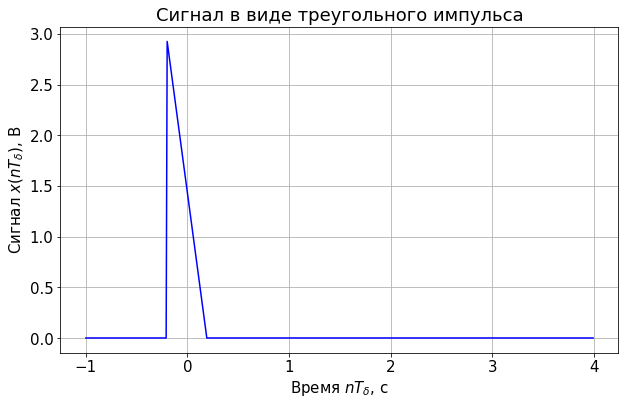

In [222]:
fig, ax  = plt.subplots() # создаем холст
ax.plot(x,y, color='b') # отрисовываем график
ax.grid() # отображаем сетку на графике
ax.set_xlabel('Время $nT_\delta$, с') # подписываем оси
ax.set_ylabel('Сигнал $х(nT_\delta)$, B')
ax.set_title('Сигнал в виде треугольного импульса')

### Моделирование последовательности треугольных импульсов

In [223]:
x = np.arange(-0.2,0.2,1/fd) #задаем массив точек х, первый параметр левая граница, второй правая(не включается), третий - шаг
y = [0 for i in range(len(x))] # создаем массив значений y из 0 той же длины что и х
cnt = 0
for i in range(len(y)): # заполнения массива значений y
    if x[i]>-0.2 and x[i]<0.2:
        cnt+=1# на одном из промежутков нашей прямой строим прямую y = a - b*x, где а - высота пилы,
        y[i] = 3-3*cnt/40 # b - a деленное на длину отрезка деленную на шаг

In [224]:
period_y = y # размножаем значения у в массиве что бы сделать пилообразный сигнал
pre_zeroes = [0 for i in range(0,80)]# сколько y будет равен нулю перед пилообразным сигналом
post_zeroes = [0 for i in range(0,60)]# сколько y будет равен нулю между пиками
period_y = np.concatenate([pre_zeroes,period_y])
period_y = np.concatenate([period_y,post_zeroes])
for i in range(3):
    period_y = np.concatenate([period_y,y])
    period_y = np.concatenate([period_y,post_zeroes])
last_zeroes = [0 for i in range(0,20)]# сколько y будет равен нулю после пилообразного сигнала
period_y = np.concatenate([period_y,last_zeroes])

In [225]:
x = np.arange(tmin,tmax,1/fd) # увеличиваем границы по х

Text(0.5, 1.0, 'Сигнал в виде треугольного импульса')

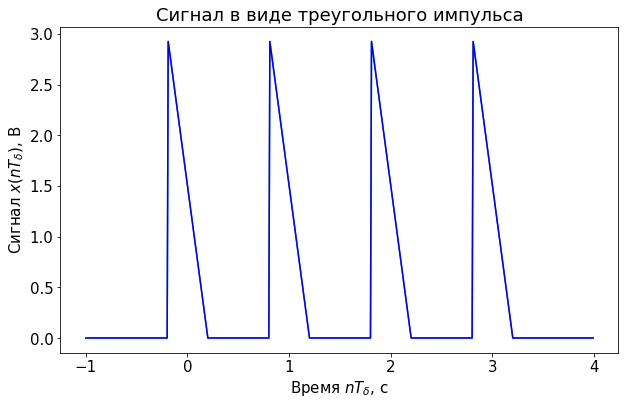

In [226]:
fig, ax  = plt.subplots()
ax.plot(x,period_y)
ax.grid()
fig.set_size_inches((10,6), forward=True)
ax.plot(x,period_y, color='b') # отрисовываем график
ax.grid() # отображаем сетку на графике
ax.set_xlabel('Время $nT_\delta$, с') # подписываем оси
ax.set_ylabel('Сигнал $х(nT_\delta)$, B')
ax.set_title('Сигнал в виде треугольного импульса')

### Моделирование сигнала с линейной частотной модуляцией

In [326]:
x = np.arange(tmin,tmax,0.01) # создаем диапазон х
"""
формула для ЛЧМ-сигнала y = A*cos(f+2*pi*(f*t+(b*t^2)/2))
где А - амплитуда сигнала, f - начальная частота сигнала b - коэффициент, влияющий на скорость увеличения частоты сигнала
"""
y = 3*np.cos(fmin+2*np.pi*(fmin*x+((fmax-fmin)/(tmax-tmin))*x*x/2)) # согласно приведеной выше формуле получаем y

In [327]:
(fmax-fmin)/(tmax-tmin)

1.6

Text(0.5, 1.0, 'Сигнал с линейной частотной модуляцией')

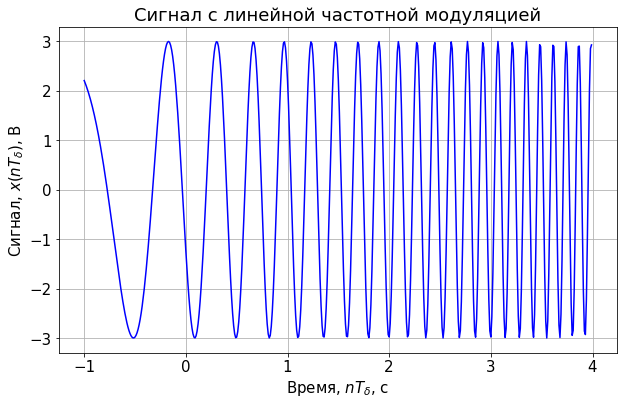

In [328]:
fig, ax  = plt.subplots()
ax.plot(x,y, color='b') # отрисовываем график
ax.grid() # отображаем сетку на графике
ax.set_xlabel('Время, $nT_\delta$, с') # подписываем оси
ax.set_ylabel('Сигнал, $х(nT_\delta)$, B')
ax.set_title('Сигнал с линейной частотной модуляцией')

## Расчет энергетических характеристик сигнала

### Моделирование сигнала во временной области

In [334]:
x = np.arange(tmin,tmax,(tmax-tmin)/N) # создаем диапазон х
"""
формула для сигнала во временной области y = A*sin(2*pi*f0*t)
где А - амплитуда сигнала, f0 - начальная частота сигнала
"""
y = A0+A*np.sin(2*np.pi*f0*x)

Text(0.5, 1.0, 'Сигнал во временной области')

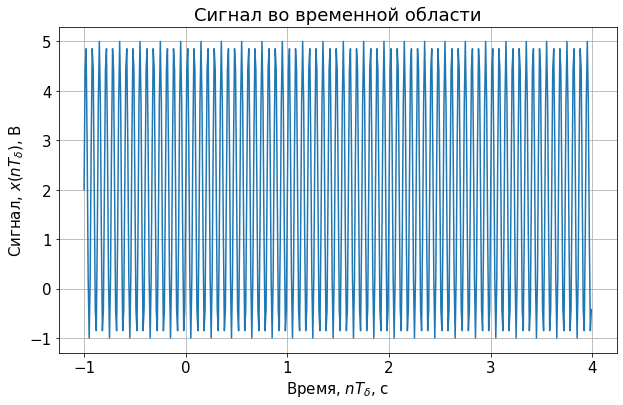

In [330]:
fig, ax  = plt.subplots()
ax.plot(x,y)
ax.grid() # отображаем сетку на графике
ax.set_xlabel('Время, $nT_\delta$, с') # подписываем оси
ax.set_ylabel('Сигнал, $х(nT_\delta)$, B')
ax.set_title('Сигнал во временной области')

### Расчет энергии и мощности сигнала на заданном интервале во временной и частотной области

In [331]:
# Расчет энергии и средней мощности сигнала во временной области
Et = (1/fd) * sum(y*y)
Pt = Et/(dt)
print('Энергия сигнала во временной области: {Et}\n'.format(Et=Et))
print('Мощность сигнала во временной области: {Pt}\n'.format(Pt=Pt))
# Расчет энергии и средней мощности сигнала в частотной области

X = fft(y,N);
Ew = 1/(fd*N) * sum(abs(X)*abs(X));
# Вывод результата
print('Энергия сигнала во временной области: {Ew} \n'.format(Ew=Ew));


Энергия сигнала во временной области: 42.499999999999936

Мощность сигнала во временной области: 8.499999999999988

Энергия сигнала во временной области: 42.49999999999996 




### Расчет амплитудного спектра сигнала

In [332]:
x = np.arange(-50,50,(tmax-tmin)/N) # Формирование значений
#add = [5 for i in range(len(x)-len(y))] # Формирование значений
#y = np.concatenate([y,add]) # Формирование значений

Text(0.5, 1.0, 'Амплитудный спектр сигнала')

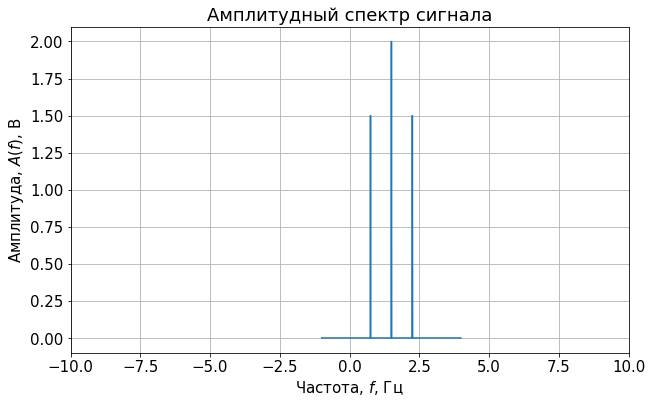

In [336]:
af = fftshift(abs(fft(y)/N)) # Формирование значений
fig, ax  = plt.subplots() 
ax.plot(x,af)
ax.grid()
ax.set_xlim([-10,10])
ax.set_xlabel('Частота, $f$, Гц')
ax.set_ylabel('Амплитуда, $A(f)$, В')
ax.set_title('Амплитудный спектр сигнала')

### Расчет энергетического спектра сигнала

In [337]:
ef = (1/(N*fd))*(abs(fft(y))*abs(fft(y))) # Формирование значений

Text(0.5, 1.0, 'Энергетический спектр сигнала')

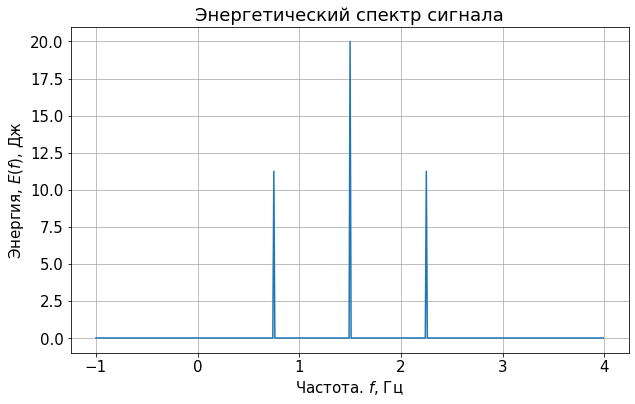

In [338]:
fig, ax  = plt.subplots()
ax.plot(x,fftshift(ef))
ax.grid()
ax.set_xlabel('Частота. $f$, Гц')
ax.set_ylabel('Энергия, $E(f)$, Дж')
ax.set_title('Энергетический спектр сигнала')

###  Расчет спектра мощности сигнала

In [319]:
pf = ef/dt; # Формирование значений

Text(0.5, 1.0, 'Спектр мощности сигнала')

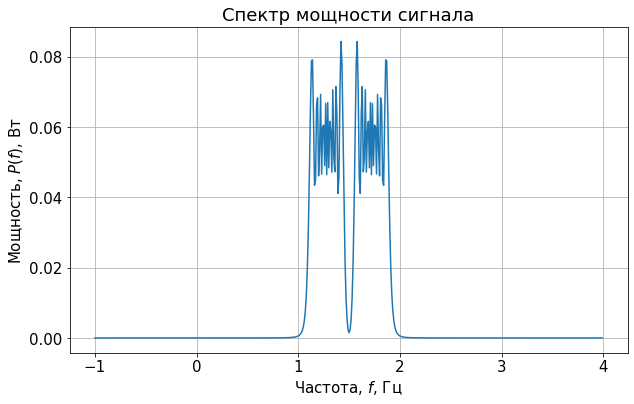

In [320]:
fig, ax  = plt.subplots()
ax.plot(x,fftshift(pf))
ax.grid()
ax.set_xlabel('Частота, $f$, Гц')
ax.set_ylabel('Мощность, $P(f)$, Вт')
ax.set_title('Спектр мощности сигнала')

Text(0.5, 1.0, 'Сигнал в виде теругольного импульса')

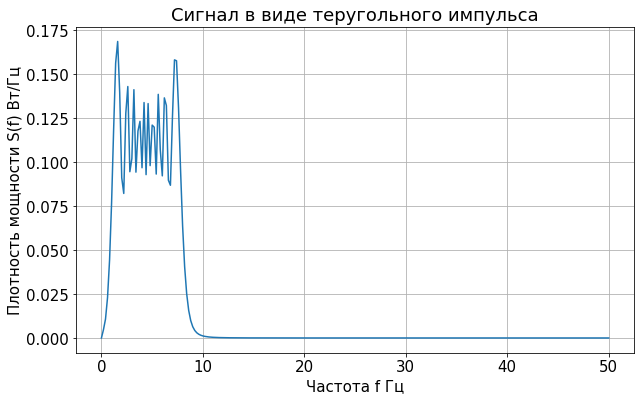

In [321]:
pf,ff = periodogram(y, fd,scaling = 'spectrum') # Формирование значений
fig, ax  = plt.subplots()
ax.plot(pf,ff)
ax.grid()
ax.set_xlabel('Частота f Гц')
ax.set_ylabel('Плотность мощности S(f) Вт/Гц')
ax.set_title('Сигнал в виде теругольного импульса')

In [322]:
xf,ff = periodogram(y,fd, np.ones(y.size))

Text(0.5, 1.0, 'Функция спектральной плотности мощности')

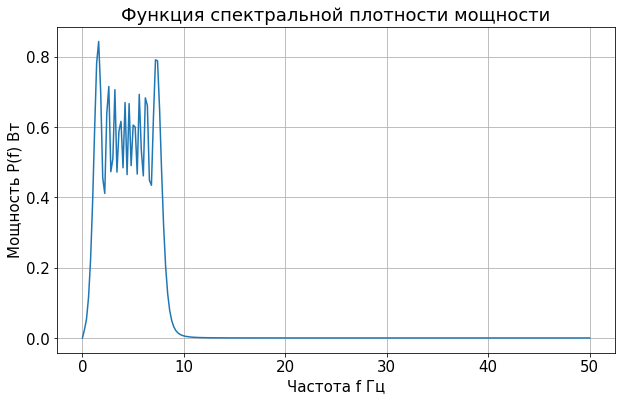

In [323]:
fig, ax  = plt.subplots()
ax.plot(xf,ff)
ax.grid()
ax.set_xlabel('Частота f Гц')
ax.set_ylabel('Мощность P(f) Вт')
ax.set_title('Функция спектральной плотности мощности')